First analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [2]:
df = pd.read_csv('../gadock.dat', header=None)
df.columns = ['generation', 'individual','fitness','pdb']
df

,generation,individual,fitness,pdb
0,0,0,10.115,pdbs/gd_-0.40_0.10_-0.10_-0.70.pdb
1,0,1,10.925,pdbs/gd_0.60_0.11_-0.45_0.50.pdb
2,0,2,8.878,pdbs/gd_-0.90_-0.90_0.40_0.60.pdb
3,0,3,8.693,pdbs/gd_-0.83_0.80_-0.20_0.50.pdb
4,0,4,7.413,pdbs/gd_0.50_0.30_0.30_-0.10.pdb
...,...,...,...,...
24995,24,995,0.804,pdbs/gd_-0.03_-0.96_-0.30_0.39.pdb
24996,24,996,0.393,pdbs/gd_-0.12_-1.00_-0.30_0.45.pdb
24997,24,997,0.307,pdbs/gd_-0.10_-1.00_-0.30_0.45.pdb
24998,24,998,3.222,pdbs/gd_-0.10_-0.94_-0.69_0.45.pdb


In [3]:
# df.iloc[::-1].head()

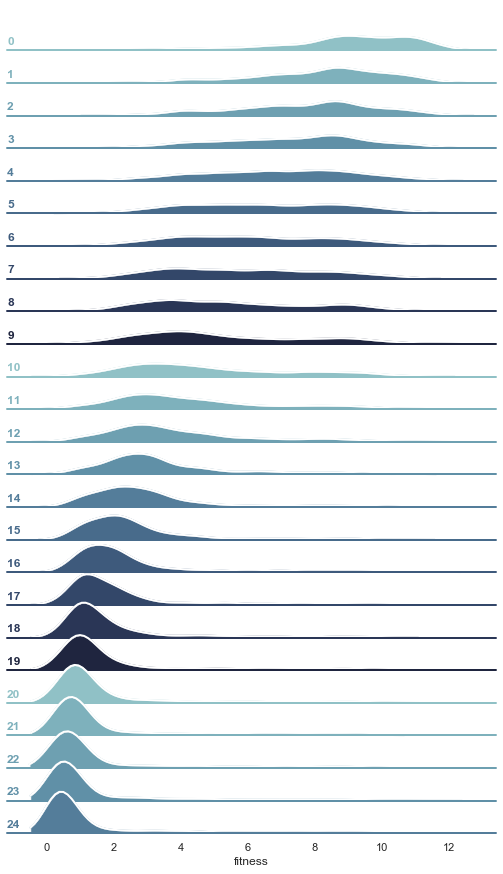

In [4]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="generation", hue="generation", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "fitness", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "fitness", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "fitness")
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig('ridge.png')